# Combinando Python y R

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos la librería `rpy2` que será la que nos permita combinar el código de `R` con el de `Python` y los módulos necesarios para que esto sea posible.

In [6]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

Activamos el método `numpy2ri` de `rpy2.robjects` de la siguiente manera para que puedan convivir los objetos de R con los objetos de python.

In [7]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

Para pasar código de R en python debemos escribirlo como cadena de caracteres, aprovechando las triples ", que nos permiten hacer intros de forma cómoda.

In [8]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

Para ejecutarla hacemos lo siguiente.

In [9]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:

Nos devuelve un objeto R de clase 'función' guardado en el espacio de variables globales de R.

Podemos acceder a esta función compilada en R a través de python de la siguiente manera.

In [10]:
saludar_py = ro.globalenv['saludar']

In [11]:
res = saludar_py('Antonio Banderas')
res

"'Hola, Antonio Banderas'"


Y ahora volvemos a estar trabajando con objetos de python.

In [12]:
res[0]

'Hola,  Antonio Banderas'

In [13]:
type(res)

rpy2.robjects.vectors.StrVector

Si queremos acceder al código de la función en R  usaremos el siguiente método. Con él podemos acceder a nombres disponibles en el entorno global de R (funciones, variables, vectores, etc.)

In [14]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


### Acceder a python desde R

Ahora ejemplificaremos como acceder a objetos de python usando el lenguage R.

In [15]:
python_var = ro.FloatVector(np.arange(1,5,0.1))

Vamos que el objeto lo hemos creado con python, y puede ser interpretado por R.

In [12]:
python_var

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [13]:
print(python_var.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


Sin embargo, `python_var` es una variable que no está disponible en el entorno global de variables de R. 

In [14]:
# ro.r('python_var') nos da error.

Para ello, agregamos la variable de python en el entorno de R de la siguiente manera.

In [15]:
ro.globalenv['var_to_r'] = python_var

In [16]:
ro.r('var_to_r')

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


Y ahora podemos operar con esta variable usando el lenguaje de R.

In [17]:
ro.r('sum(var_to_r)')

118.000000


In [18]:
ro.r('mean(var_to_r)')

2.950000


In [19]:
ro.r('sd(var_to_r)')

1.169045


Ahora tenemos el objeto (variable) tanto en R como en python.

In [20]:
np.sum(python_var)

118.00000000000007

In [21]:
np.mean(python_var)

2.950000000000002

In [22]:
np.std(python_var)

1.1543396380615207

In [23]:
ro.r('summary(var_to_r)')

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


Si quisiéramos obtener un gráfico usando R, python nos devolverá un objeto con la información de este, además de producir el propio gráfico (no incrustado en jupyter notebooks).

In [ ]:
hist = ro.r('hist(var_to_r, breaks = 4)')
hist

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


Aunque lo interesante de la función pasa por aprovechar el poder de procesamiento y la potencia de cálculo de R.

### Trabajar de manera conjunta entre R y Python

Una de las tareas básicas para trabajar Machine Learning con R será cargar los paquetes adecuados.

Cuando no estén instalados, como en el siguiente ejemplo, habrá que pasar la función `install.packages` de R antes de importar el paquete.

In [16]:
from rpy2.robjects.packages import importr

In [17]:
#ro.r("install.packages('extRemes')")
extremes = importr("extRemes") # equivale a library('extRemes')

*Al intentar hacer `install.packages` python se quejó alegando un RRuntimeError: Error in contrib.url(repos, "source") :    trying to use CRAN without setting a mirror Calls: <Anonymous> -> <Anonymous> -> install.packages -> contrib.url*

*Finalmente se optó por instalar el paquete desde la consola en un entorno R directamente.*

Ahora podemos acceder a funciones de la librería de la siguiente manera. La guardamos en una variable de python para poder acceder a ella de manera más directa.

In [18]:
fevd = extremes.fevd

Ahora podemos, por ejemplo, acceder a la documentación (de R) de la siguiente manera.

In [6]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x1193af308> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data to which the E

Ahora cargaremos un data set para probar la funcionalidad de la programación R en un entorno python.

Aprovecharemos la carga para leer la fecha y hora como un solo elemento que colocaremos como `index_col`.

In [21]:
data = pd.read_csv("../../../GitHub/python-ml-course/datasets/time/time_series.txt",
                   delim_whitespace=True, skiprows = 1, parse_dates = [[0,1]],
                   names = ['date', 'time', 'wind_speed'],
                   index_col = 0)

In [22]:
 data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [23]:
data.shape

(275352, 1)

El siguiente ejercicio consistirá en buscar la velocidad máxima del viento por años y luego utilizar estos valores en R para calcular valores extremos con la librería extRemes.

In [24]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq='A')).max()

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [25]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

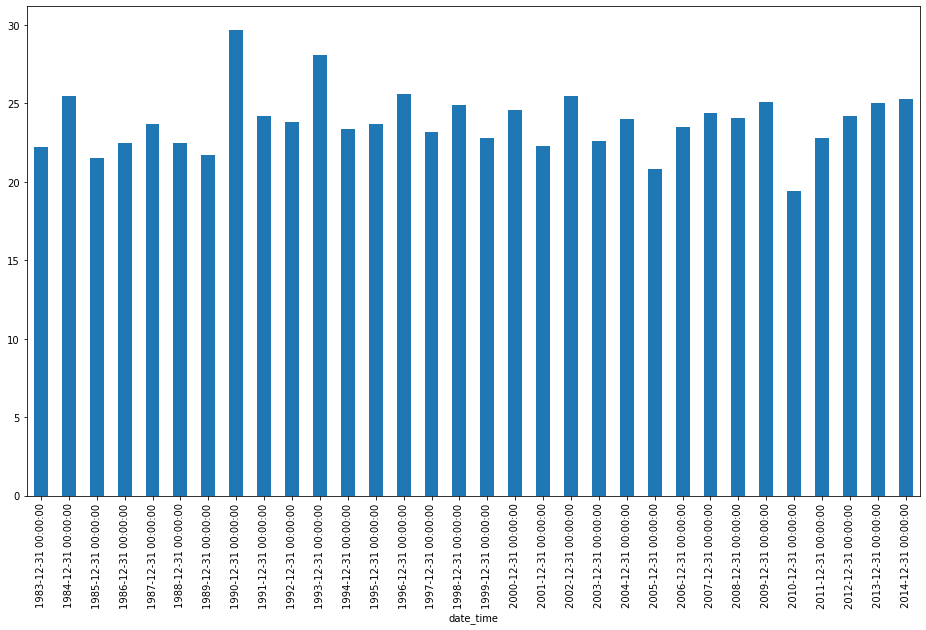

In [26]:
max_ws.plot(kind='bar', figsize=(16,9))

Ahora Vamos a calcular los parámetros de un estimador generalizado de máxima verosimilitud con la función `fevd` (Fit Extreme Value Distribution) que hemos cargado y la vamos a guardar de nuevo en python utilizando la librería de R.

Como parámetros le vamos a pasar:
* Los valores máximos obtenidos
* type = 'GEV'
* method = 'GMLE' - Generalized Maximum Likelyhood Estimation

In [28]:
result = fevd(max_ws.values, type='GEV', method='GMLE')

In [23]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


El objeto resultante

In [24]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
[LangSexpV..., StrSexpVe..., FloatSexp..., BoolSexpV..., ..., StrSexpVe..., StrSexpVe..., ListSexpV..., ListSexpV...]
  call: <class 'rpy2.rinterface.LangSexpVector'>
  <rpy2.rinterface.LangSexpVector object at 0x1238c9b48> [RTYPES.LANGSXP]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.BoolArray'>
  R object with classes: ('array',) mapped to:
[       0,        0,        0,        0, ...,        0,        0,        0,        0]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
['na.fail']
  priorFun: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) map

Las variables que devuelve el modelo

In [26]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



En results es donde se guardan los resultados del ajuste de máxima verosimilitud de los estimadores llevados a cabo. Para acceder a ello hacemos lo siguiente.

In [27]:
res = result.rx('results')

In [29]:
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





Para acceder a los valores de `par` como `location`, `scale` y `shape` lo podemos hacer con métodos de python.

In [30]:
loc, scale, shape = res[0].rx('par')[0]

In [31]:
loc

23.063941519915588

In [32]:
scale

1.7576912874286317

In [33]:
shape

-0.1628816367714792

Vemos como combinando los lenguajes podemos acceder a funcionalidades más potentes.

## Función mágica para R

Esta función ejecuta código en R, y opcionalmente, devuelve resultados en python en tiempo de ejecución.

Es decir, permite ejecutar código de R al añadir `%R` en una celda del shell de python o `%%R` cuando necesitemos escribir más de una línea de código.

También facilita la incrustación de gráficos producidos con R en el IPython Notebook.

Esta es la forma más sencilla de interactuar con R a través de Python.

In [1]:
%load_ext rpy2.ipython

In [35]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
   

In [2]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [3]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



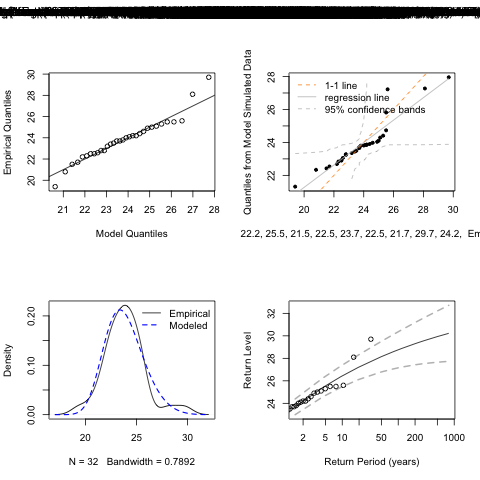

In [29]:
%R -i result plot.fevd(result)

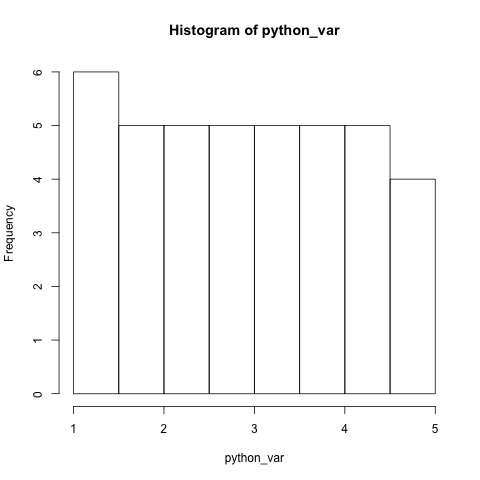

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [31]:
%R -i python_var hist(python_var)

Habrá que **evitar nombrar variables de la misma forma en el entorno R y el entorno Python, ya que esto generará un error `rpy2.interface.NULL`, lo que podrá bloquear la sesión del Notebook y tener consecuencias como la pérdida del trabajo hecho.**

## Un ejemplo complejo de R, Python y RMagic

In [32]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"]

Tipo de Ajuste:  GEV
Método de Ajuste:  MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      28        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





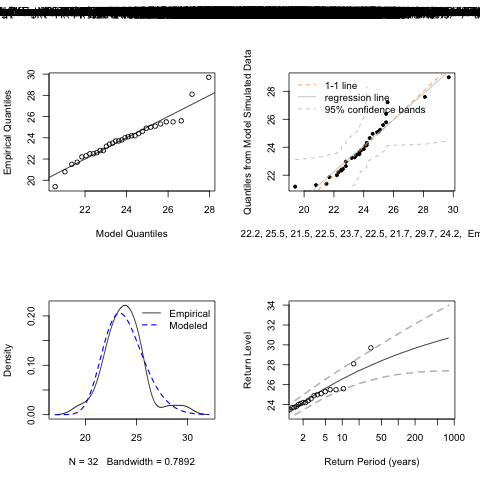

Tipo de Ajuste:  GEV
Método de Ajuste:  GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





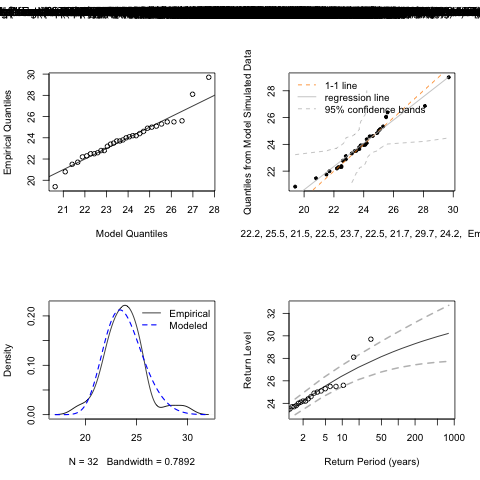

Tipo de Ajuste:  GEV
Método de Ajuste:  Bayesian
         location log.scale         shape new
    [1,] 23.06394 0.5640012 -1.628816e-01   0
    [2,] 23.02200 0.4776451 -1.041643e-01   2
    [3,] 23.19446 0.5993309 -1.216815e-01   3
    [4,] 23.10933 0.6123281 -1.216815e-01   2
    [5,] 23.17032 0.6452354 -1.216815e-01   2
    [6,] 23.14002 0.5901302 -1.953220e-01   3
    [7,] 23.39837 0.5990220 -2.030563e-01   2
    [8,] 23.39837 0.5986615 -2.030563e-01   1
    [9,] 23.39837 0.5471286 -2.030563e-01   1
   [10,] 23.18624 0.7016453 -5.378351e-02   3
   [11,] 23.18624 0.7016453 -7.925792e-02   1
   [12,] 23.19793 0.6681752 -2.182139e-01   3
   [13,] 23.17824 0.7137437 -2.213717e-01   3
   [14,] 23.00151 0.7137437 -2.213717e-01   1
   [15,] 22.93703 0.7738609 -1.832230e-01   3
   [16,] 22.98414 0.7237400 -2.210035e-01   3
   [17,] 22.72786 0.7561402 -2.210035e-01   2
   [18,] 22.72786 0.7561402 -2.210035e-01   0
   [19,] 22.55180 0.7638236 -2.063339e-01   2
   [20,] 22.55180 0.7638236 -2.

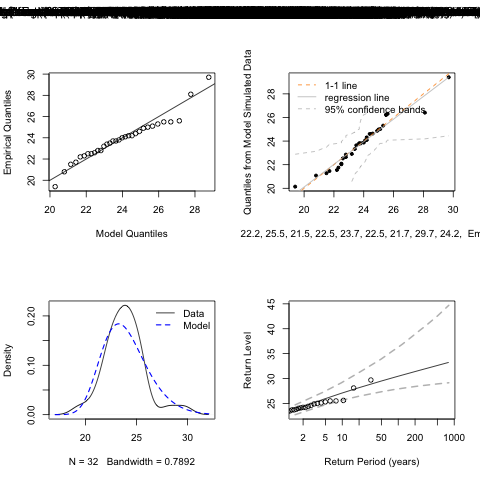

Tipo de Ajuste:  GEV
Método de Ajuste:  Lmoments
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 



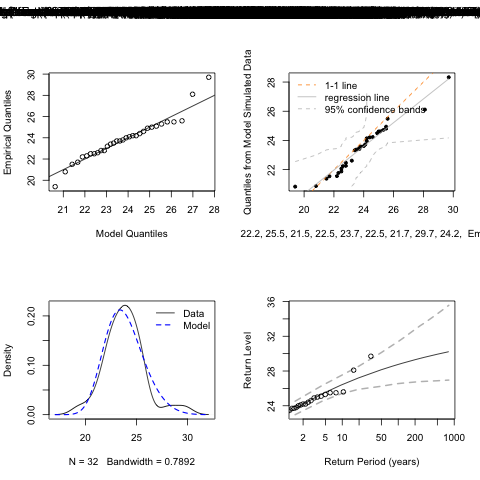

Tipo de Ajuste:  Gumbel
Método de Ajuste:  MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





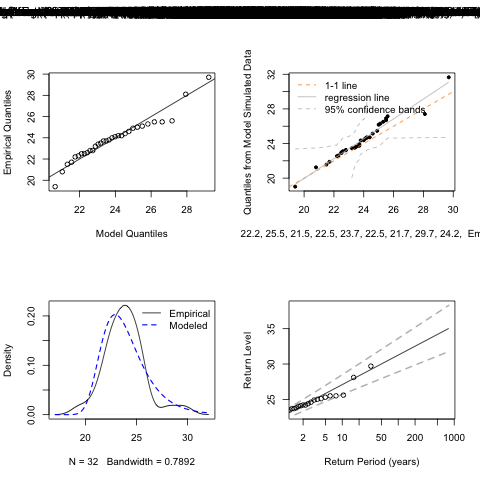

Tipo de Ajuste:  Gumbel
Método de Ajuste:  GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





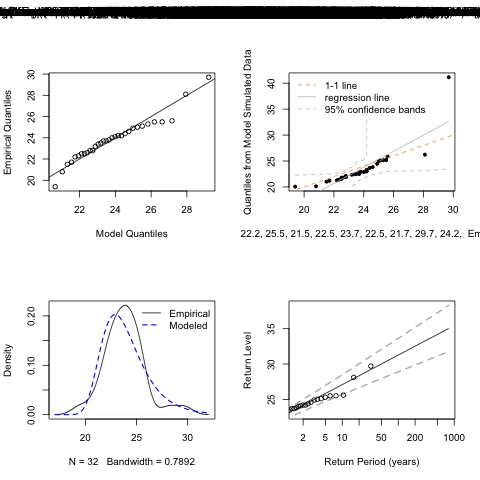

R[write to console]: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  número de items para para sustituir no es un múltiplo de la longitud del reemplazo
Calls: <Anonymous>

R[write to console]: Además: 
R[write to console]: Warning message:

R[write to console]: In (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  :
R[write to console]: 
 
R[write to console]:  fevd: Using method MLE.  No default for specified arguments.



Tipo de Ajuste:  Gumbel
Método de Ajuste:  Bayesian


RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  número de items para para sustituir no es un múltiplo de la longitud del reemplazo
Calls: <Anonymous>


In [33]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método de Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)